# Machine Learning Nanodegree

## Capstone Project

## Gold Rates Prediction using Machine Learning Approach

Historically, gold had been used as a form of currency in various parts of the world including USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. 

Forecasting rise and fall in the daily gold rates, can help investors to decide when to buy (or sell) the commodity. 

We in this project would forecast gold rates using the most comprehensive set of features and would apply various machine learning algorithms for forecasting and compare their results. We also identify the attributes that highly influence the gold rates.

![Gold ETF](Gold.PNG)



## Project Work Flow

I would proceed the project as shown in the below mentioned steps.


![Project Work Flow](pd.png)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil import parser

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

## About Data

Data for this study is collected from **November 18th 2011** to **January 1st 2025** from various sources. The data has **1718** rows in total and **80** columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of  US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered. 

**Attributes:**

**Features**

- Gold ETF :- Date, Open, High, Low, Close and Volume.
- S&P 500 Index :- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume' 
- Dow Jones Index :- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume' 
- Eldorado Gold Corporation (EGO) :- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'
- EURO - USD Exchange Rate :- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend' 
- Brent Crude Oil Futures :- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'
- Crude Oil WTI USD :- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'
- Silver Futures :- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'
- US Bond Rate (10 years) :- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend' 
- Platinum Price :- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'
- Palladium Price :- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend' 
- Rhodium Prices :- 'RHO_PRICE' 
- US Dollar Index : 'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend' 
- Gold Miners ETF :- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume' 
- Oil ETF USO :- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'

**Target Variable**
- Gold ETF :- Adjusted Close

In [2]:
df=pd.read_csv

In [3]:
sentiment_df = pd.read_csv

In [4]:
df_final = pd.read_csv("FINAL_USO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [5]:
df_final.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000  ...   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996  ...   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001  ...   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000  ...   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998  ...   

              GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open  \
Date                                                                     
2011-12-15  51.570000  51.680000      48.973877    20605600  36.900002   
2011-12-16  52.040001  52.680000      49.921513    16285400  36.180000   
2011-12-19  51.029999  51.169998      48.490578    15120200  36.389999   
2011-12-20  52.369999  52.990002      50.215282    11644900  37.299999   
2011-12-21  52.419998  52.959999      50.186852     8724300  37.669998   

             USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Date                                                                    
2011-12-15  36.939999  36.049999  36.130001      36.130001    12616700  
2011-12-16  36.500000  35.730000  36.270000      36.270000    12578800  
2011-12-19  36.450001  35.930000  36.200001      36.200001     7418200  
2011-12-20  37.610001  37.220001  37.560001      37.560001    10041600  
2011-12-21  38.240002  37.520000  38.110001      38.110001    10728000  

[5 rows x 80 columns]

In [6]:
df_final.shape

(1718, 80)

So, we have (1718, 80)records in the dataset and 18 columns including Adjusted Close which is our target variable.

In [7]:
df_final.describe()

Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  ...  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000  ...   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222  ...   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999  ...   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001  ...   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500  ...   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529999  ...   
75%    1.020795e+07   237.292500   237.722500   236.147503   236.889996  ...   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987  ...   

           GDX_Low    GDX_Close  GDX_Adj Close    GDX_Volume     USO_Open  \
count  1718.000000  1718.000000    1718.000000  1.718000e+03  1718.000000   
mean     26.384575    26.715012      25.924624  4.356515e+07    22.113417   
std      10.490908    10.603110       9.886570  2.909151e+07    11.431056   
min      12.400000    12.470000      12.269618  4.729000e+06     7.820000   
25%      20.355000    20.585000      20.180950  2.259968e+07    11.420000   
50%      22.870001    23.054999      22.677604  3.730465e+07    16.450000   
75%      26.797500    27.317500      26.478154  5.697055e+07    34.419998   
max      56.770000    57.470001      54.617039  2.321536e+08    41.599998   

          USO_High      USO_Low    USO_Close  USO_Adj Close    USO_Volume  
count  1718.000000  1718.000000  1718.000000    1718.000000  1.718000e+03  
mean     22.307148    21.904657    22.109051      22.109051  1.922313e+07  
std      11.478671    11.373997    11.432787      11.432787  1.575743e+07  
min       8.030000     7.670000     7.960000       7.960000  1.035100e+06  
25%      11.500000    11.300000    11.392500      11.392500  6.229500e+06  
50%      16.635001    16.040000    16.345000      16.345000  1.613015e+07  
75%      34.667499    34.110000    34.417499      34.417499  2.672375e+07  
max      42.299999    41.299999    42.009998      42.009998  1.102657e+08  

[8 rows x 80 columns]

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

# Checking Missing Values

In [9]:
df_final.isnull().values.any()

False

That's great ! we dont have any missing values in our dataset

In [10]:
print(df_final.isnull().sum())

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64


## Effect of Index prices on gold rates

In [11]:
import pandas as pd

df_final = pd.read_csv('FINAL_USO.csv')  # or your actual file
# Convert the 'Date' column to datetime format
df_final['Date'] = pd.to_datetime(df_final['Date'])

In [12]:
# Set 'Date' as the index
df_final.set_index('Date', inplace=True)

In [13]:
print(df_final.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

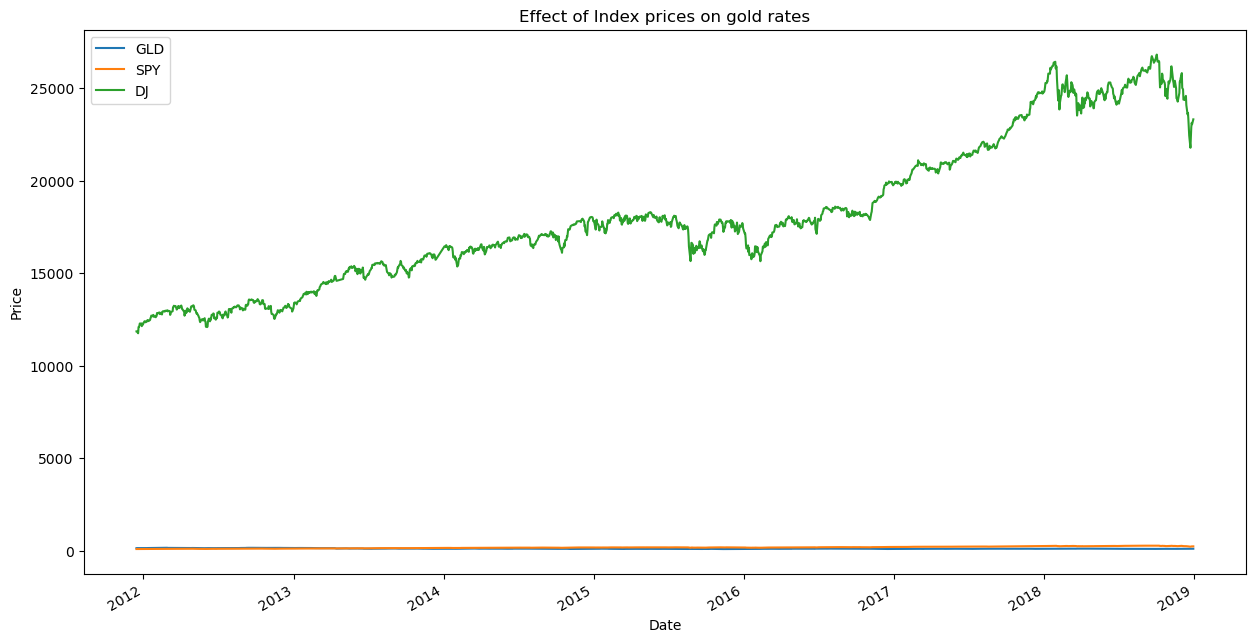

In [14]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

## Computing Daily Returns of all Features

In [15]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return


### Insight from Plot:

Seasonal Decomposition

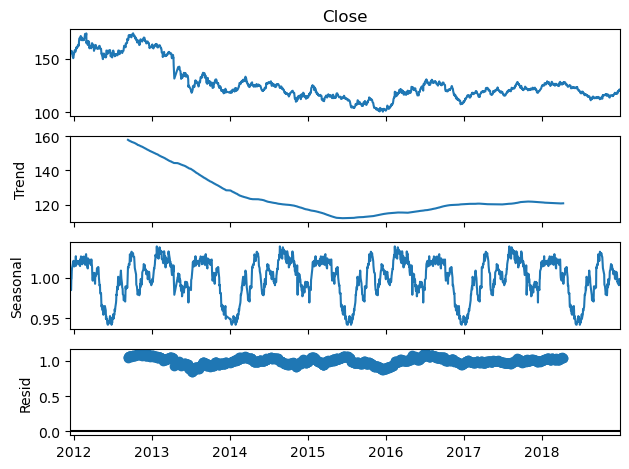

In [16]:
decomposition = seasonal_decompose(df_final['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

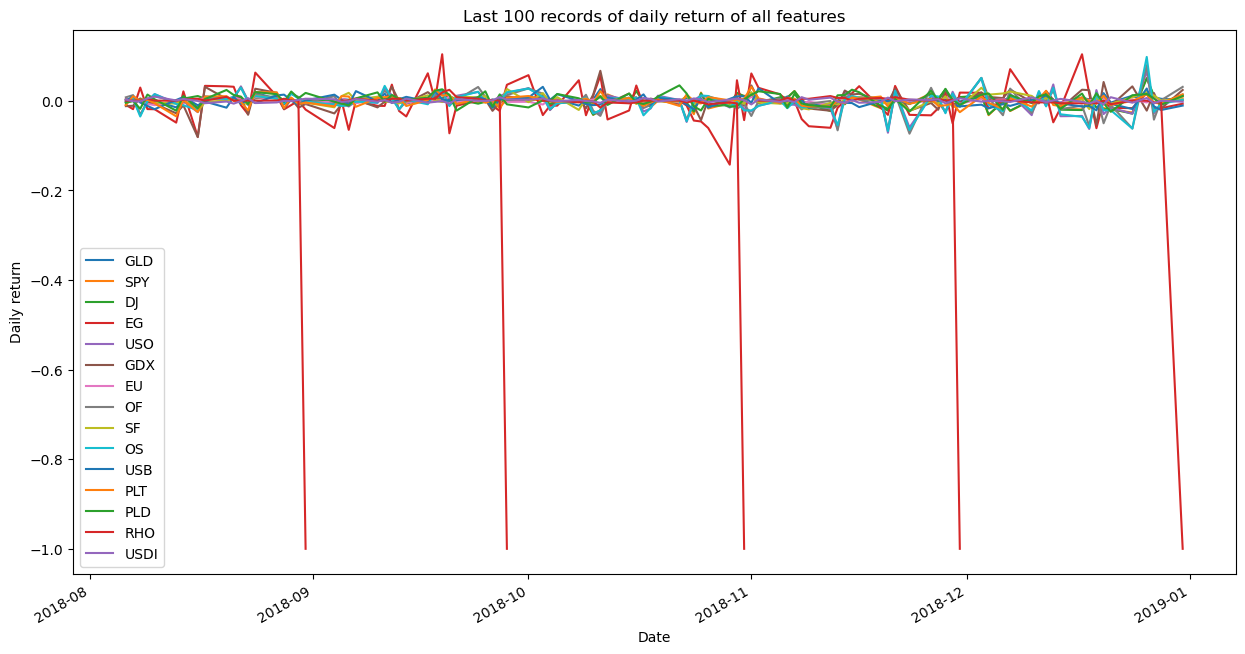

In [17]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']
EG_adj_close =  df_final['EG_Ajclose']
USO_Adj_close = df_final['USO_Adj Close']
GDX_Adj_close = df_final['GDX_Adj Close']
EU_price      = df_final['EU_Price']
OF_price      = df_final['OF_Price']
OS_price      = df_final['OS_Price']
SF_price      = df_final['SF_Price']
USB_price      = df_final['USB_Price']
PLT_price      = df_final['PLT_Price']
PLD_price      = df_final['PLD_Price']
rho_price      = df_final['RHO_PRICE']
usdi_price      = df_final['USDI_Price']



GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)

df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_Adj_return,
                  'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                  'RHO':rho_price,'USDI':USDI_price})

daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

### Forecast

## Computing daily returns of stock indexes

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_prices = pd.read_csv("FINAL_USO.csv")
# Convert date if needed
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.set_index('Date', inplace=True)

# Check your columns
print(df_prices.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

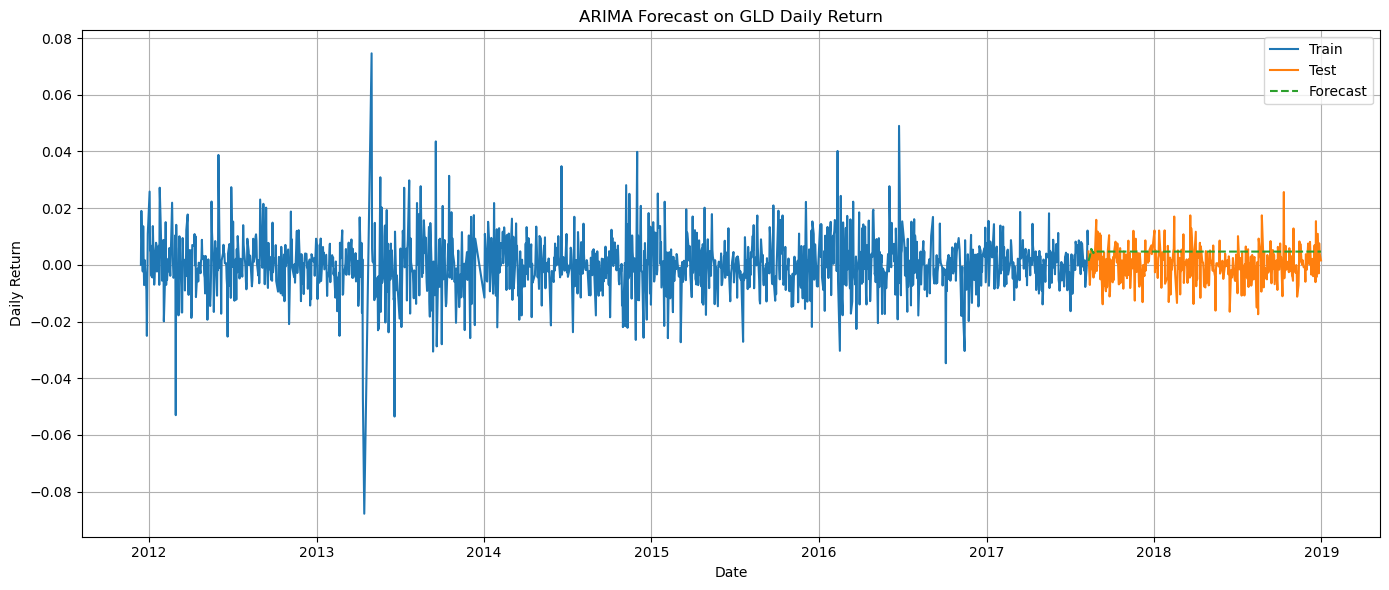

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load and prepare the data
df_final = pd.read_csv('FINAL_USO.csv')  # replace with your actual file path
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final.set_index('Date', inplace=True)

# Step 2: Compute Daily Returns
def compute_daily_returns(df):
    daily_return = df.pct_change()
    daily_return.iloc[0] = 0  # Set first return to 0
    return daily_return

# Step 3: Select one series for ARIMA, e.g., 'GLD'
GLD_adj_close = df_final['Adj Close']  # Adjust to your actual column name
GLD_daily_return = compute_daily_returns(GLD_adj_close).dropna()

# Step 4: Train/Test Split
train_size = int(len(GLD_daily_return) * 0.8)
train = GLD_daily_return[:train_size]
test = GLD_daily_return[train_size:]

# Step 5: Fit ARIMA Model
model = ARIMA(train, order=(5, 1, 0))  # You can tune (p,d,q) later
model_fit = model.fit()

# Step 6: Forecast
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# Step 7: Plot Results
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast on GLD Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Simple Moving Average (SMA) Strategy:

In [20]:
df_final['SMA_50'] = df_final['Close'].rolling(window=50).mean()
df_final['SMA_200'] = df_final['Close'].rolling(window=200).mean()



In [21]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [22]:
forecast = model_fit.forecast(steps=len(test))
test.index = forecast.index  # Ensure test and forecast indices match

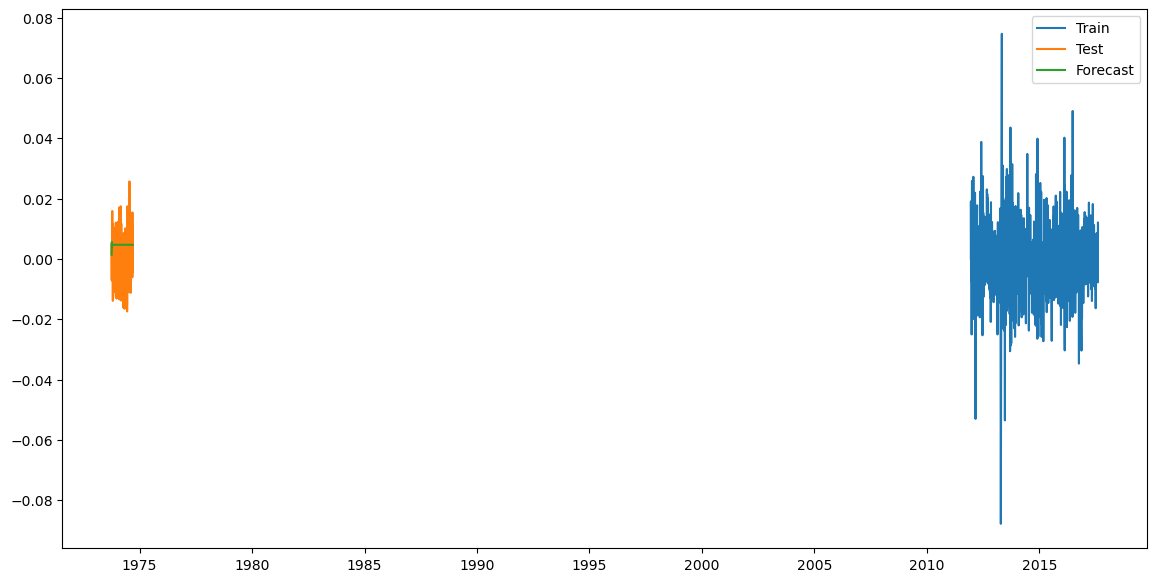

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

### Simple Moving average

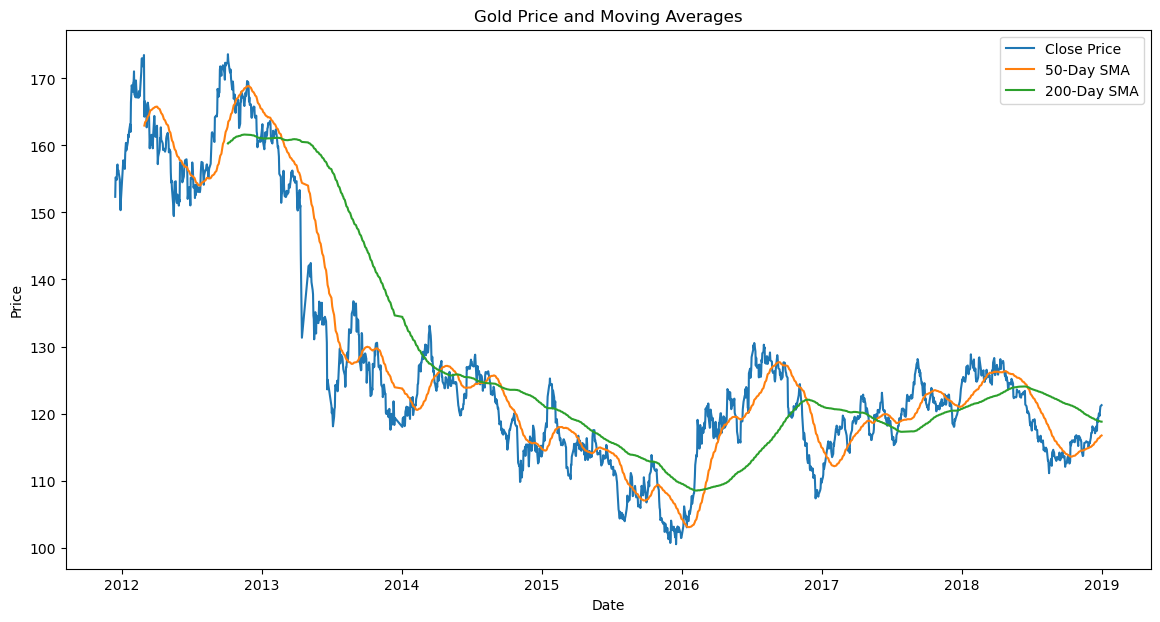

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(df_final['Close'], label='Close Price')
plt.plot(df_final['SMA_50'], label='50-Day SMA')
plt.plot(df_final['SMA_200'], label='200-Day SMA')
plt.title('Gold Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate the model

In [25]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 0.007709483365825177


## Statistical Measures (Mean, Standard deviation, Kurtosis)

**Kurtosis** is a statistical measure that is used to describe the distribution. Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that is generally less extreme than the tails of the normal distribution.


For investors, high kurtosis of the return distribution implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as **kurtosis risk**.

**Positive Kurtosis**
More weights in the tail

![Positive](pos.png)

**Negative Kurtosis**
It has as much data in each tail as it does in the peak.

![Negative](neg.png)

Mean= -8.65698612128203e-05
Standard Deviation= 0.00961153616700639
Kurtosis= 8.606584924918355


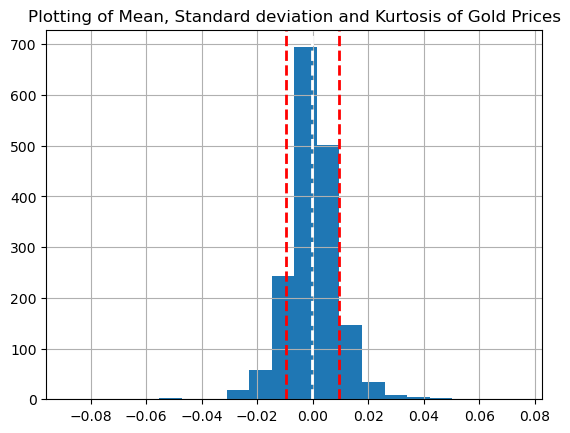

In [26]:
# computing mean,standard deviation and kurtosis of Gold ETF daily return

mean=df_d['GLD'].mean()
# computing standard deviation of Gold stock
std=df_d['GLD'].std()
kurt=df_d['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

Mean= 0.0005366024364688835
Standard Deviation= 0.008262309911393526
Kurtosis= 3.4557859039745233


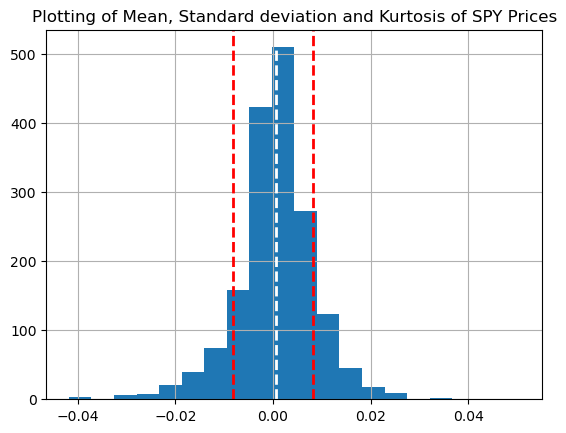

In [27]:
# computing mean,standard deviation and kurtosis of S&P 500 Index daily return

mean=df_d['SPY'].mean()
# computing standard deviation of Gold stock
std=df_d['SPY'].std()
kurt=df_d['SPY'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['SPY'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of SPY Prices")
plt.show()

Mean= 0.0004266395218751805
Standard Deviation= 0.00815178011451231
Kurtosis= 3.832719336260695


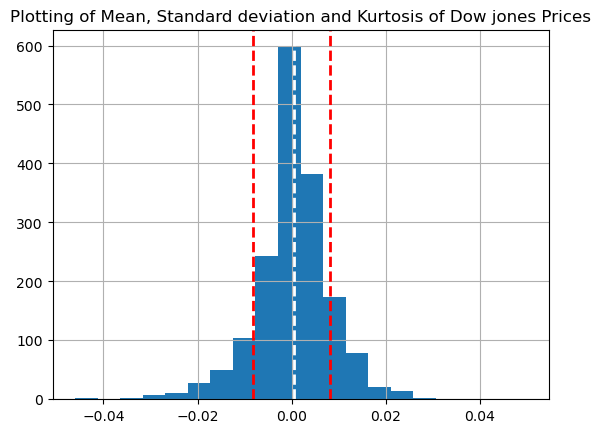

In [28]:
# computing mean,standard deviation and kurtosis of Dow Jones Index daily return
mean=df_d['DJ'].mean()
# computing standard deviation of Gold stock
std=df_d['DJ'].std()
kurt=df_d['DJ'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['DJ'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Dow jones Prices")
plt.show()

## Correlation Analysis

### Plotting Correlation Matrix

<Axes: >

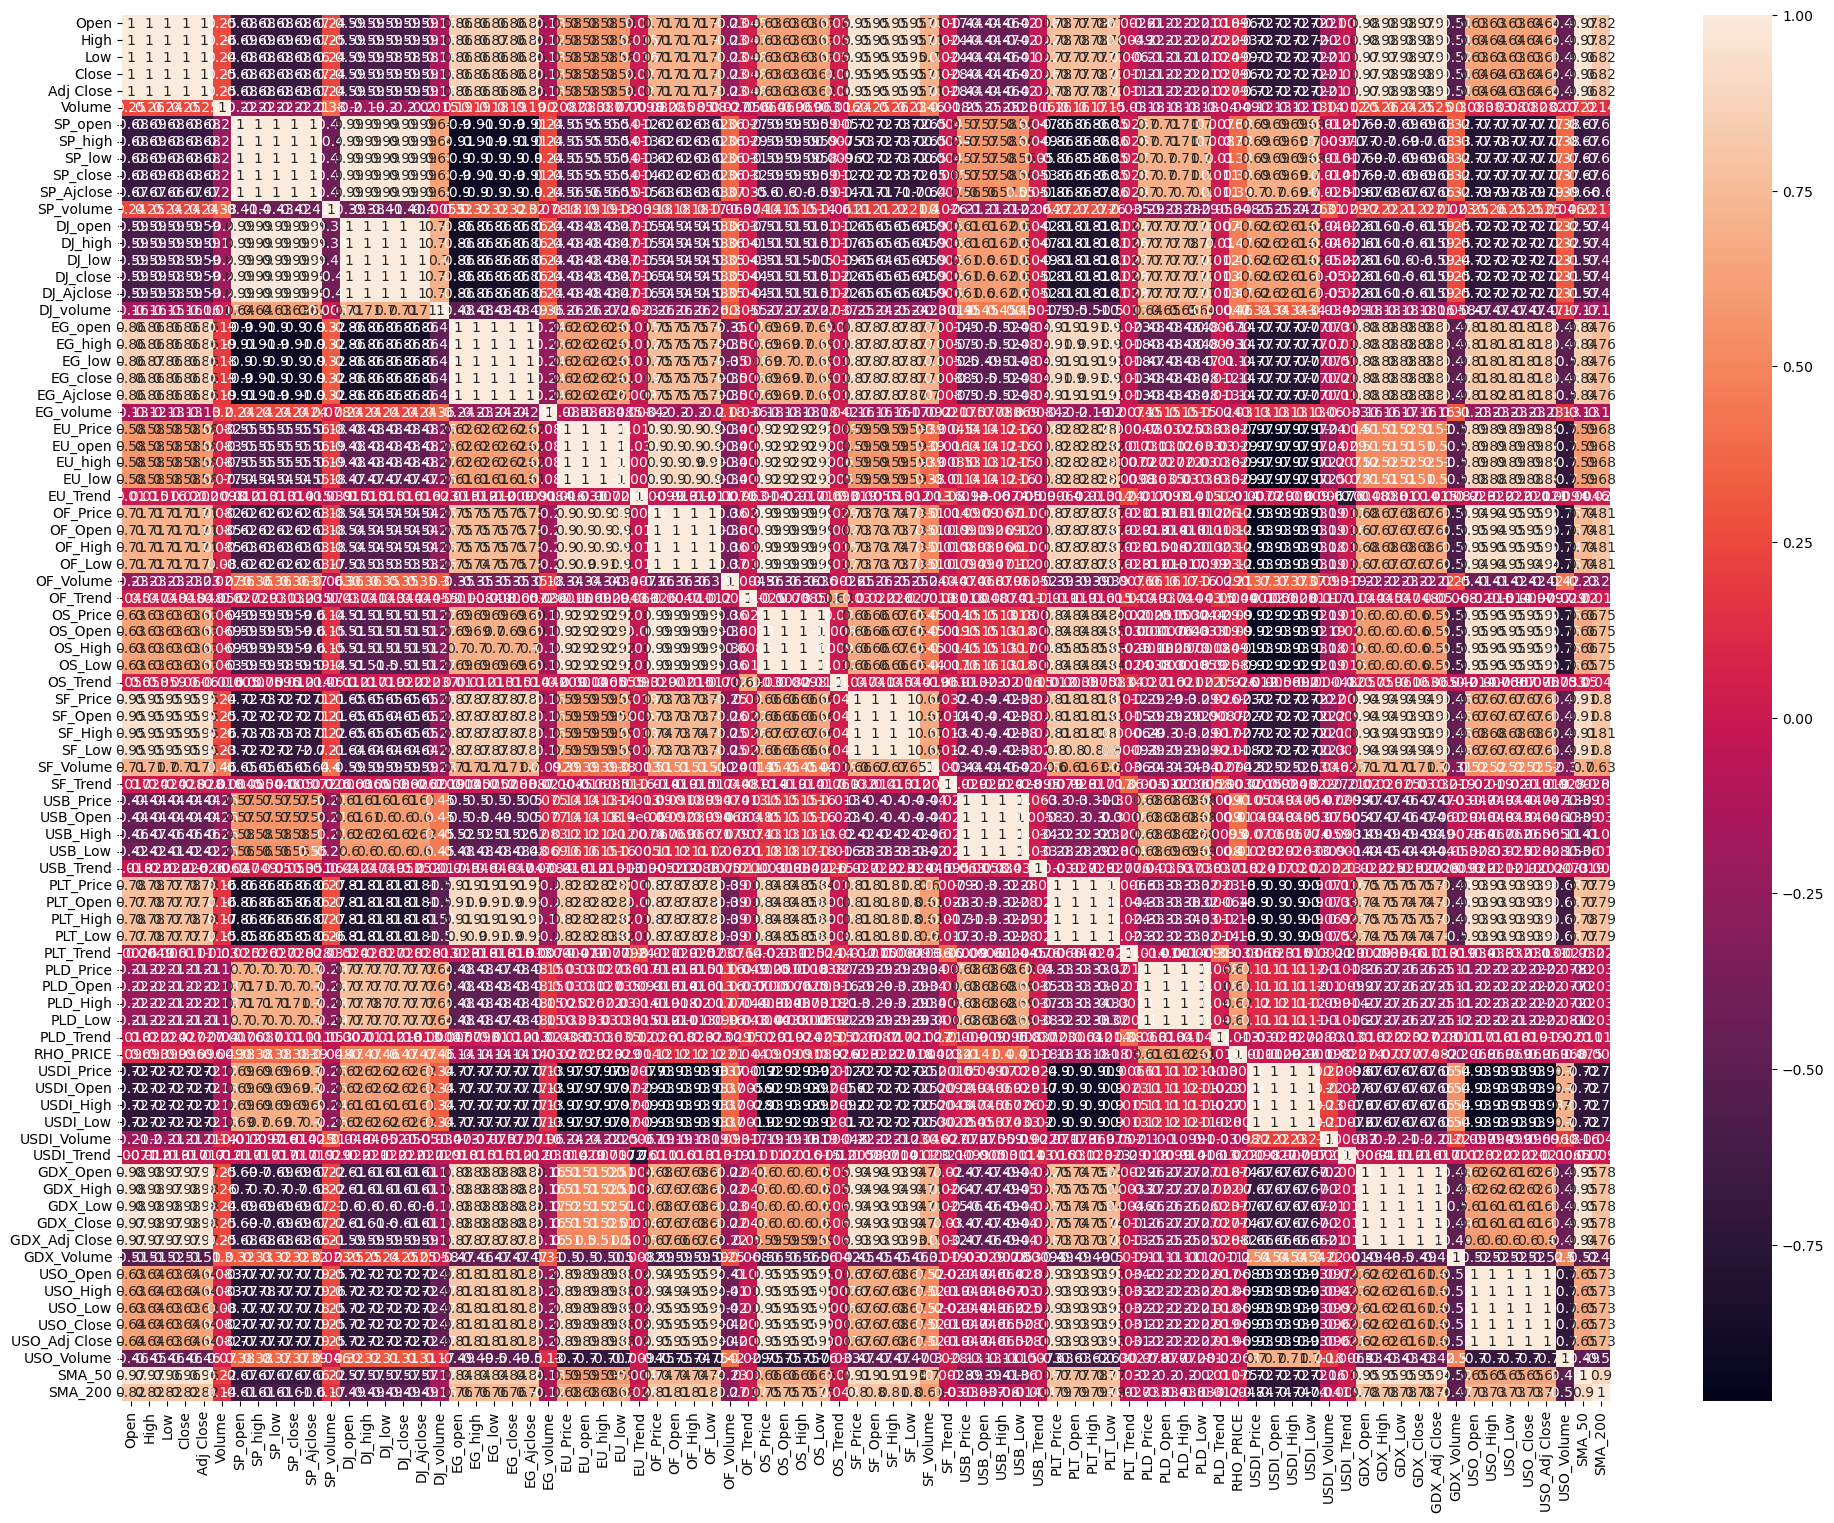

In [29]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_final.corr(), annot=True) 

In [30]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<Axes: title={'center': 'Correlation with Adj Close'}>

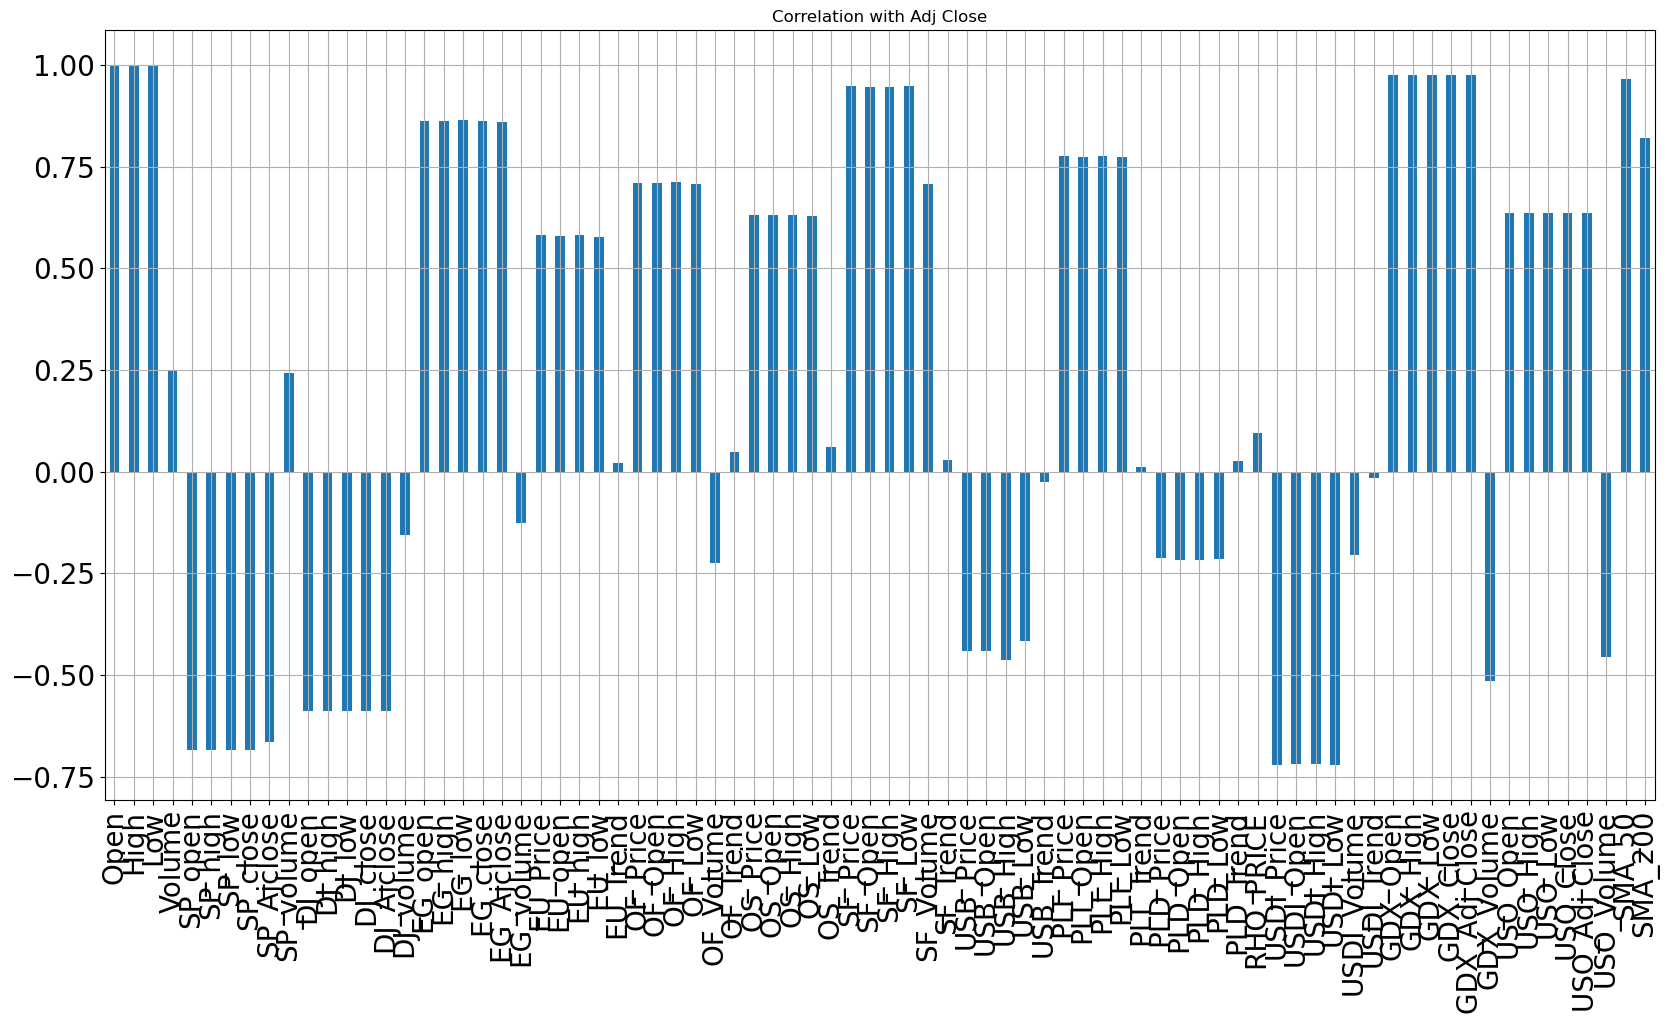

In [31]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [32]:
corr_matrix=df_final.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)

### Positively Correlated Variables

In [33]:
pos_corr=coef[coef>0]
pos_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SMA_50           0.964640
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
SMA_200          0.819419
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Close        0.635675
USO_Adj Close    0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low      

### Negatively Correlated Variables

In [34]:
neg_corr=coef[coef<0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_close      -0.588411
DJ_Ajclose    -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

## Technical Indicators

I will also use following technical indicators which I feel help as a feature for prediction of Gold price

**1. MACD :** The moving average convergence-divergence (MACD) is one of the most powerful and well-known indicators in technical analysis. The indicator is comprised of two exponential moving averages that help measure momentum in a security. The MACD is simply the difference between these two moving averages plotted against a centerline, where the centerline is the point at which the two moving averages are equal.

**2. RSI :** The relative strength index (RSI) is another well known momentum indicators that’s widely used in technical analysis. The indicator is commonly used to identify overbought and oversold conditions in a security with a range between 0 (oversold) and 100 (overbought).

**3. Simple Moving Average (SMA) :** simply takes the sum of all of the past closing prices over a time period and divides the result by the total number of prices used in the calculation. For example, a 10-day simple moving average takes the last ten closing prices and divides them by ten.

**4. Upper Band**

**5. Lower Band**

**6. DIFF**

**7. Open-Close**

**8. High-Low**

In [35]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

## Plotting Technical Indicators

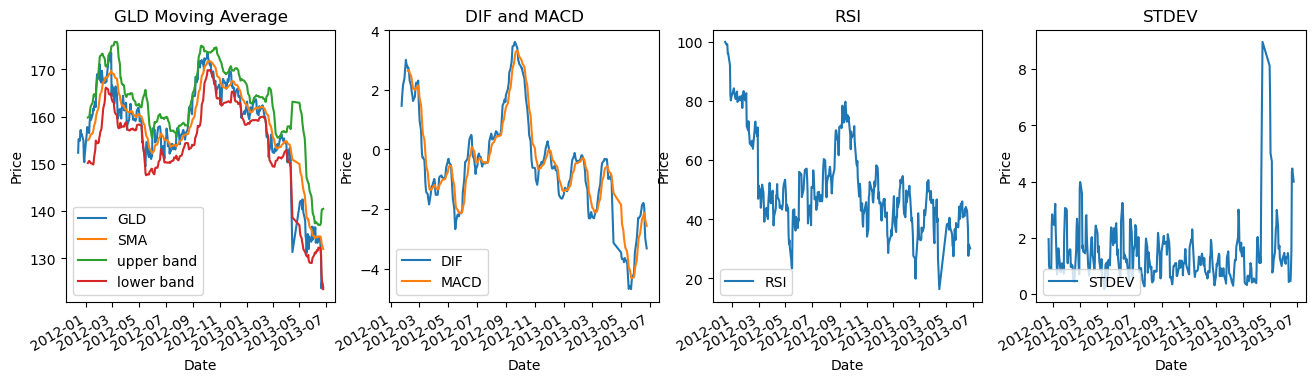

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=df_final.Open - df_final.Close

High_Low=df_final.High-df_final.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

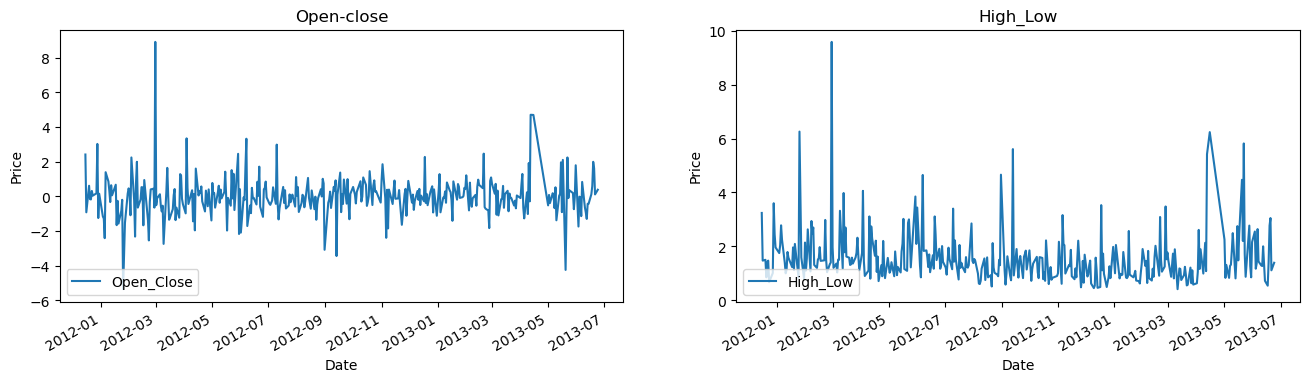

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=df_final.Open - df_final.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=df_final.High-df_final.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')




axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')


## Train Test Split

In this step we would perform Train test split using sklearn's Timeseries split

In [43]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
       

In [44]:
X_train.shape

(1450, 84)

In [45]:
X_test.shape

(145, 84)

In [46]:
y_train.shape

(1450,)

In [47]:
y_test.shape

(145,)

In [48]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

## Solution Model 

### Support Vector Regressor (SVR)

RMSE:  0.8136915781863289
R2 score:  0.8474998982809998


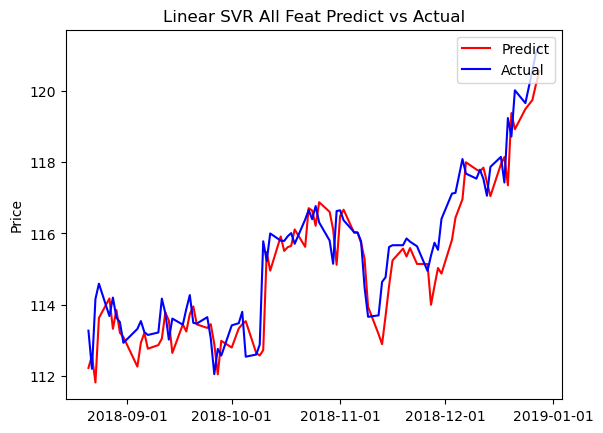

In [50]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')


### Hyperparameter Tuning
In this step I will tune two parameters of SVR C and epsilon to see if the model shows any improvement.

RMSE:  0.7417766706101224
R2 score:  0.8732649232939584


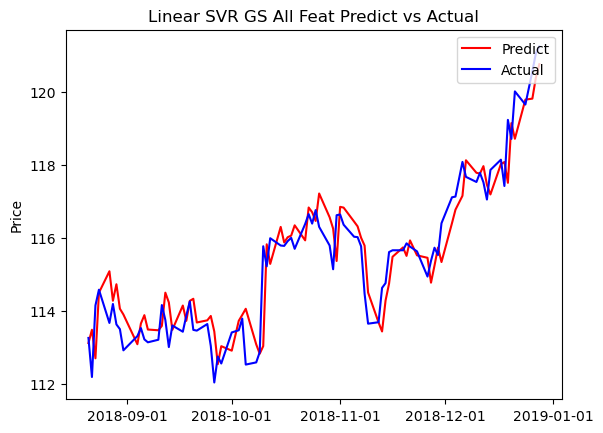

In [51]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')


As we have seen using gridsearch on SVR we get significant improvement in R2 score and RMSE also came down so we will save this as our first solution model 

In [52]:

solution_models['SVR All Feat'] = lsvr_grid_search_feat

## Hyper parameter Tuning
In this I will tune 3 parameters of Random forest which are n_estimators,max_features,max_depth

In [54]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

grid_search_RF_feat.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

## Solution Model : Lasso and Ridge

RMSE:  0.7117047240324101
R2 score:  0.8833324203076948


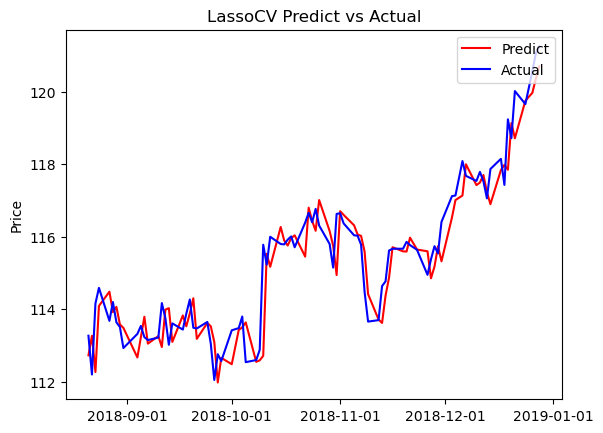

RMSE:  0.7186272522956701
R2 score:  0.881051804781274


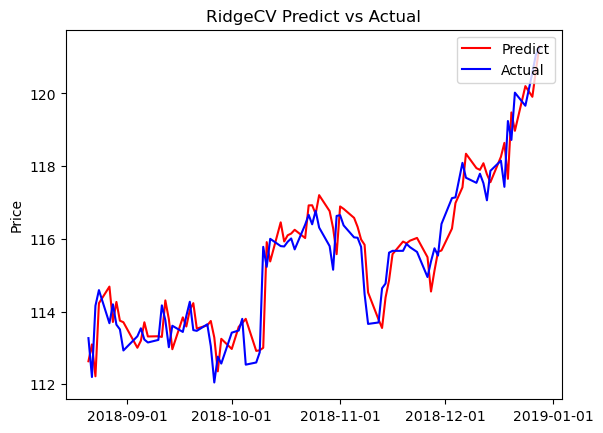

In [57]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

## Solution Model : Stochastic Gradient Descent (SGD)

RMSE:  0.9131594911617015
R2 score:  0.8079369743586491


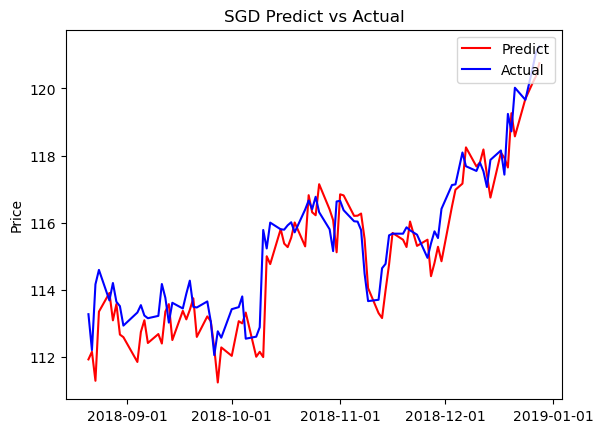

In [60]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

## Model Review
In this step, we will review benchmark model and all the solution model based on evaluation metrics i.e, RMSE and R2 score

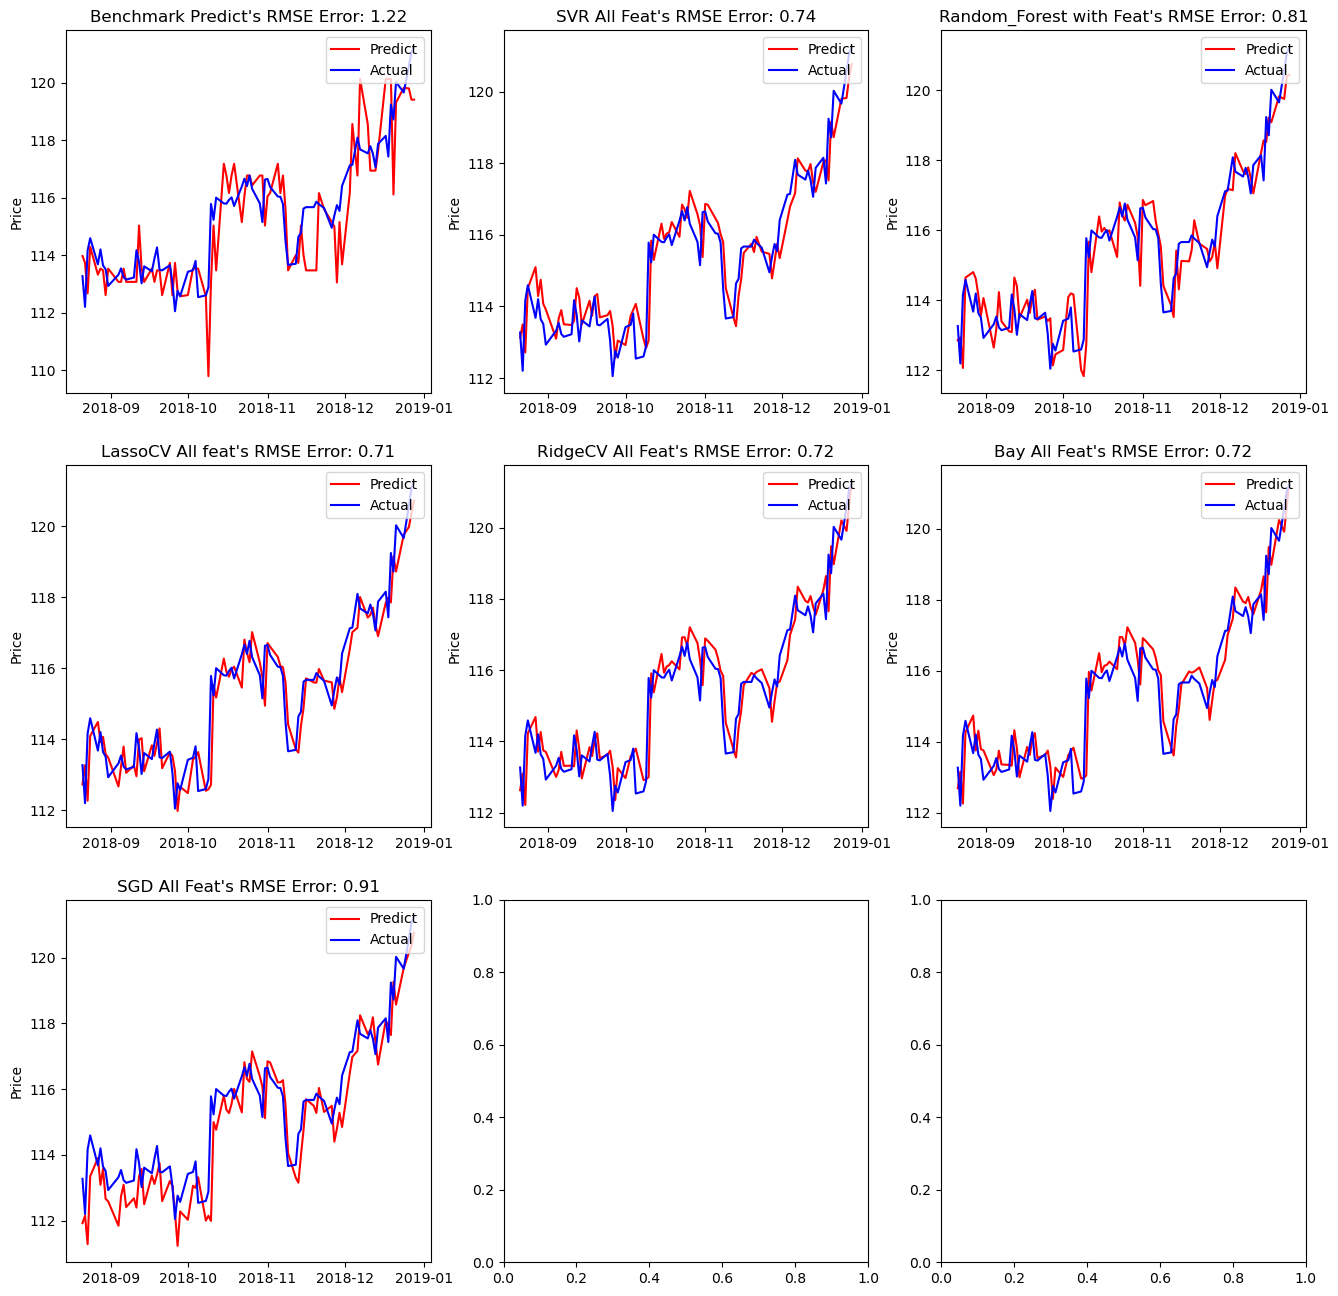

In [61]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

# Ensemble Solution

So now we will ensemble top three performing models i.e, in case of all the features model Lasso,Bayesian ridge and Ridge are the best performing models so we will ensemble these three models while in case of feature selected models we will combine Lasso,Bayesian Ridge and Linear SVR and will compare all the feature ensemble models with feature selected ensemble models.

In [64]:
# Choosing the top three performing models to ensemble them
ensemble_solution_models = [lasso_clf_feat, bay_feat, ridge_clf_feat]
class EnsembleSolution:
    models = []
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        for i in self.models:
            i.fit(X, y)
    def predict(self, X):
        result = 0
        for i in self.models:
            result = result + i.predict(X)
        
        result = result / len(self.models)
        
        return result

Ensemble solution with feature selection has better solution (RMSE 0.711 and  R2score 0.884 ) but Lasso has best performance (RMSE - 0.709 and R2 score 0.884)

## Train Model Multiple Times
By the train_reg_multipletimes function.This function would train the model several times (I choosed 7 times ), and use different parameters on TimeSeriesSplit in each time, average the R2 and RMSE.
I will apply this function on Benchmark model and on top performing solution models with all features which are Linear SVR, Lasso, Ridge and Bayesian ridge and compare the same.

In [66]:
def train_reg_multipletimes(model, times):
    total_rmse = 0
    total_r2 = 0
    for i in range(times):
        reg = model
        for train_index, test_index in TimeSeriesSplit(n_splits=i+2).split(feature_minmax_transform):
            X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
            y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
            reg.fit(X_train, y_train)
        predicted = reg.predict(validation_X)
        rmse, r2 = print_result(validation_y, predicted, [0,len(validation_y)])
        total_rmse += rmse
        total_r2 += r2
    return total_rmse / times, total_r2 / times

def print_result(actual, predict, index):
    RMSE_score = np.sqrt(mean_squared_error(actual, predict))
    print('From {} to {}'.format(index[0],index[-1]))
    print('RMSE: ', RMSE_score)
    R2_score = r2_score(actual, predict)
    print('R2 score: ', R2_score)
    print('---------------------')
    return RMSE_score, R2_score

In [67]:
print('Benchmark')
t_multiple_benchmark_RMSE,t_multiple_benchmark_R2 = train_reg_multipletimes(benchmark_dt, 7)
print('RMSE: {} //  R2: {}\n'.format(t_multiple_benchmark_RMSE, t_multiple_benchmark_R2))


Benchmark
From 0 to 89
RMSE:  2.346579479187656
R2 score:  -0.2682971841342343
---------------------
From 0 to 89
RMSE:  1.877772693825027
R2 score:  0.18784947379069872
---------------------
From 0 to 89
RMSE:  1.5517043184568713
R2 score:  0.44541460414941547
---------------------
From 0 to 89
RMSE:  1.228646252656072
R2 score:  0.6523003831290335
---------------------
From 0 to 89
RMSE:  1.1670957113959453
R2 score:  0.6862646627576489
---------------------
From 0 to 89
RMSE:  1.2755668698014893
R2 score:  0.6252367876091889
---------------------
From 0 to 89
RMSE:  1.25920125218031
R2 score:  0.6347915772003545
---------------------
RMSE: 1.52950951107191 //  R2: 0.42336575778601515



In [68]:
print('LSVR')
t_multiple_LSVR_RMSE,t_multiple_LSVR_R2 = train_reg_multipletimes(linear_svr_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_LSVR_RMSE, t_multiple_LSVR_R2))

LSVR
From 0 to 89
RMSE:  7.448867721245366
R2 score:  -11.7800047550332
---------------------
From 0 to 89
RMSE:  6.193065714058755
R2 score:  -7.834090985860843
---------------------
From 0 to 89
RMSE:  3.5200527459775
R2 score:  -1.853966254598363
---------------------
From 0 to 89
RMSE:  1.3163166995561397
R2 score:  0.6009096070465562
---------------------
From 0 to 89
RMSE:  1.1821445047896582
R2 score:  0.6781217534479693
---------------------
From 0 to 89
RMSE:  1.0975015118077582
R2 score:  0.7225653214944754
---------------------
From 0 to 89
RMSE:  0.9590853012742563
R2 score:  0.7881321977328654
---------------------
 RMSE: 3.1024334569584906 //  R2: -2.6683333022529347


In [69]:
print('Lasso')
t_multiple_lasso_RMSE,t_multiple_lasso_R2 = train_reg_multipletimes(lasso_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_lasso_RMSE, t_multiple_lasso_R2))

Lasso
From 0 to 89
RMSE:  1.1414461432193486
R2 score:  0.6999032159588521
---------------------
From 0 to 89
RMSE:  1.618490312192714
R2 score:  0.39664807914681277
---------------------
From 0 to 89
RMSE:  1.2272053345148644
R2 score:  0.653115447517213
---------------------
From 0 to 89
RMSE:  0.9458767879471349
R2 score:  0.7939276958254289
---------------------
From 0 to 89
RMSE:  0.827981404528535
R2 score:  0.8420965359183792
---------------------
From 0 to 89
RMSE:  0.7928926592226464
R2 score:  0.8551964245471735
---------------------
From 0 to 89
RMSE:  0.7724600996807819
R2 score:  0.8625633366388259
---------------------
 RMSE: 1.046621820186575 //  R2: 0.7290643907932407


In [70]:
print('Ridge')
t_multiple_ridge_RMSE,t_multiple_ridge_R2 = train_reg_multipletimes(ridge_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_ridge_RMSE, t_multiple_ridge_R2))

Ridge
From 0 to 89
RMSE:  3.035819230137305
R2 score:  -1.122766897539377
---------------------
From 0 to 89
RMSE:  3.3615700996136115
R2 score:  -1.6027642661659205
---------------------
From 0 to 89
RMSE:  1.656731351768678
R2 score:  0.36779973573377034
---------------------
From 0 to 89
RMSE:  0.8283219438695492
R2 score:  0.841966621407535
---------------------
From 0 to 89
RMSE:  0.7493347104664653
R2 score:  0.8706691321038702
---------------------
From 0 to 89
RMSE:  0.717599661508374
R2 score:  0.8813917381155859
---------------------
From 0 to 89
RMSE:  0.7123183568584329
R2 score:  0.8831311516715067
---------------------
 RMSE: 1.580242193460345 //  R2: 0.1599181736181387


In [71]:
print('BayRidge')
t_multiple_bayridge_RMSE,t_multiple_bayridge_R2 = train_reg_multipletimes(bay_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_bayridge_RMSE, t_multiple_bayridge_R2))

BayRidge
From 0 to 89
RMSE:  3.00494526192359
R2 score:  -1.0798098080552143
---------------------
From 0 to 89
RMSE:  3.3171867780836815
R2 score:  -1.5344886031336475
---------------------
From 0 to 89
RMSE:  1.597251002756993
R2 score:  0.4123796463152286
---------------------
From 0 to 89
RMSE:  0.7995748378673904
R2 score:  0.8527454480293466
---------------------
From 0 to 89
RMSE:  0.7307474880247506
R2 score:  0.8770056522929602
---------------------
From 0 to 89
RMSE:  0.7098918230076481
R2 score:  0.8839260299485261
---------------------
From 0 to 89
RMSE:  0.7070366584924588
R2 score:  0.8848578446515437
---------------------
 RMSE: 1.5523762643080734 //  R2: 0.18523088714982047


In [72]:
print('Ensemble')
t_multiple_ensemble_RMSE,t_multiple_ensemble_R2 = train_reg_multipletimes(EnsembleSolution(ensemble_solution_models), 7)
print(' RMSE: {} //  R2: {}\n'.format(t_multiple_ensemble_RMSE, t_multiple_ensemble_R2))

Ensemble
From 0 to 89
RMSE:  2.365101085548824
R2 score:  -0.2883975971116701
---------------------
From 0 to 89
RMSE:  2.753376381729401
R2 score:  -0.746150436386072
---------------------
From 0 to 89
RMSE:  1.4876420939824517
R2 score:  0.4902615330662131
---------------------
From 0 to 89
RMSE:  0.8472355621683789
R2 score:  0.8346672670240827
---------------------
From 0 to 89
RMSE:  0.7555732429171319
R2 score:  0.8685066980736367
---------------------
From 0 to 89
RMSE:  0.7204376103092831
R2 score:  0.8804517438808747
---------------------
From 0 to 89
RMSE:  0.7109945316952355
R2 score:  0.8835651434529064
---------------------
 RMSE: 1.377194358335815 //  R2: 0.41755776457142446



In [73]:
def cross_validate(model, ts_split):
    clf = model
    total_rmse = 0
    total_r2 = 0
    count = 0
    for train_index, test_index in ts_split.split(validation_X):
        X_test1, X_test2 = validation_X[:len(train_index)], validation_X[len(train_index): (len(train_index)+len(test_index))]
        y_test1, y_test2 = validation_y[:len(train_index)].values.ravel(), validation_y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        predicted_test1 = clf.predict(X_test1)
        temp1_RMSE, temp1_R2 = print_result(y_test1, predicted_test1, train_index)

        predicted_test2 = clf.predict(X_test2)
        temp2_RMSE, temp2_R2 = print_result(y_test2, predicted_test2, test_index)
        
        total_rmse += temp1_RMSE + temp2_RMSE
        total_r2 += temp1_R2 + temp2_R2
        count += 2
    return total_rmse / count, total_r2 / count



# Cross Validation

In [74]:
timeseries_cv = TimeSeriesSplit(n_splits=10)
test_bench__RMSE, test_bench_R2 = cross_validate(benchmark_dt,timeseries_cv)

From 0 to 8
RMSE:  1.5816773136305156
R2 score:  -4.3835768203190275
---------------------
From 9 to 16
RMSE:  1.551405760917378
R2 score:  -18.04187945304726
---------------------
From 0 to 16
RMSE:  1.5675047011870964
R2 score:  -6.899320734863128
---------------------
From 17 to 24
RMSE:  0.9221727820787535
R2 score:  -6.673895597140622
---------------------
From 0 to 24
RMSE:  1.393892792437022
R2 score:  -6.795208642622705
---------------------
From 25 to 32
RMSE:  1.3997109165876913
R2 score:  -5.301290628129201
---------------------
From 0 to 32
RMSE:  1.3953054745403506
R2 score:  -4.753713853886452
---------------------
From 33 to 40
RMSE:  1.3349849615275644
R2 score:  -0.8202266231827442
---------------------
From 0 to 40
RMSE:  1.3837421152339135
R2 score:  -0.711963807942946
---------------------
From 41 to 48
RMSE:  1.069398135640321
R2 score:  -3.343623825189364
---------------------
From 0 to 48
RMSE:  1.3374765371235258
R2 score:  -0.02585061558909474
-----------------

In [75]:
test_lsvr__RMSE, test_lsvr_R2 = cross_validate(lsvr_grid_search_feat,timeseries_cv)

From 0 to 8
RMSE:  0.9599334682741848
R2 score:  -0.9829757855456136
---------------------
From 9 to 16
RMSE:  0.6199779664719565
R2 score:  -2.0409657057737385
---------------------
From 0 to 16
RMSE:  0.8177527241273801
R2 score:  -1.1498890256652272
---------------------
From 17 to 24
RMSE:  0.5009745824863987
R2 score:  -1.2647625273972016
---------------------
From 0 to 24
RMSE:  0.7314652708442456
R2 score:  -1.1466261775932094
---------------------
From 25 to 32
RMSE:  0.8002350870567801
R2 score:  -1.0596242194230783
---------------------
From 0 to 32
RMSE:  0.7487169958878811
R2 score:  -0.6567044799014006
---------------------
From 33 to 40
RMSE:  1.038026558456883
R2 score:  -0.10049898396464663
---------------------
From 0 to 40
RMSE:  0.8132895969116015
R2 score:  0.40860902184223113
---------------------
From 41 to 48
RMSE:  0.6619473434338377
R2 score:  -0.6642564488992637
---------------------
From 0 to 48
RMSE:  0.7905620964659462
R2 score:  0.6415869982422621
--------

In [76]:
test_ridge__RMSE, test_ridge_R2 = cross_validate(ridge_clf_feat,timeseries_cv)

From 0 to 8
RMSE:  0.9078352036967053
R2 score:  -0.7735734663803735
---------------------
From 9 to 16
RMSE:  0.5179907108780871
R2 score:  -1.122770067282469
---------------------
From 0 to 16
RMSE:  0.7500587359779874
R2 score:  -0.8086835599659976
---------------------
From 17 to 24
RMSE:  0.45565413479684336
R2 score:  -0.8735354621327605
---------------------
From 0 to 24
RMSE:  0.670073528817455
R2 score:  -0.8014156107546053
---------------------
From 25 to 32
RMSE:  0.6528874404141767
R2 score:  -0.3709746970151768
---------------------
From 0 to 32
RMSE:  0.6659479329304119
R2 score:  -0.3106605076418054
---------------------
From 33 to 40
RMSE:  1.0970483763867367
R2 score:  -0.22920487318717742
---------------------
From 0 to 40
RMSE:  0.7692755627689634
R2 score:  0.4708873631412559
---------------------
From 41 to 48
RMSE:  0.6186638996564047
R2 score:  -0.45372718152758074
---------------------
From 0 to 48
RMSE:  0.746763639303687
R2 score:  0.6802002600091868
---------

In [77]:
test_lasso__RMSE, test_lasso_R2 = cross_validate(lasso_clf_feat,timeseries_cv)

From 0 to 8
RMSE:  0.8919652697155918
R2 score:  -0.7121075125509915
---------------------
From 9 to 16
RMSE:  0.6533459067409695
R2 score:  -2.377111198977227
---------------------
From 0 to 16
RMSE:  0.7887184457098636
R2 score:  -0.9999357294119371
---------------------
From 17 to 24
RMSE:  0.534464373469396
R2 score:  -1.577678854409457
---------------------
From 0 to 24
RMSE:  0.717231418840948
R2 score:  -1.063895055914661
---------------------
From 25 to 32
RMSE:  0.7121634576886918
R2 score:  -0.6312186649885243
---------------------
From 0 to 32
RMSE:  0.7160061161930217
R2 score:  -0.5151063813904249
---------------------
From 33 to 40
RMSE:  1.2330096829944088
R2 score:  -0.5527648440223827
---------------------
From 0 to 40
RMSE:  0.8421870491343657
R2 score:  0.3658363013662401
---------------------
From 41 to 48
RMSE:  0.5275986038529145
R2 score:  -0.057257164000557026
---------------------
From 0 to 48
RMSE:  0.7993278087883393
R2 score:  0.6335948037365913
------------

In [78]:
test_bay_RMSE, test_bay_R2 = cross_validate(bay_feat,timeseries_cv)

From 0 to 8
RMSE:  0.9055216308093297
R2 score:  -0.7645452574021079
---------------------
From 9 to 16
RMSE:  0.5138253602387463
R2 score:  -1.08876740938224
---------------------
From 0 to 16
RMSE:  0.747224543831375
R2 score:  -0.7950407035363349
---------------------
From 17 to 24
RMSE:  0.4438617301370351
R2 score:  -0.7778155066852201
---------------------
From 0 to 24
RMSE:  0.6653709553387508
R2 score:  -0.7762196787434241
---------------------
From 25 to 32
RMSE:  0.6604271989371706
R2 score:  -0.4028224673904275
---------------------
From 0 to 32
RMSE:  0.6641758480634847
R2 score:  -0.3036944632422953
---------------------
From 33 to 40
RMSE:  1.0784663935690675
R2 score:  -0.1879165918244483
---------------------
From 0 to 40
RMSE:  0.7628891407243559
R2 score:  0.47963613978938
---------------------
From 41 to 48
RMSE:  0.6374211888624245
R2 score:  -0.5432147063458286
---------------------
From 0 to 48
RMSE:  0.7438515275725294
R2 score:  0.6826896064935658
--------------

In [79]:
test_ensemble_RMSE, test_ensemble_R2 = cross_validate(EnsembleSolution(ensemble_solution_models),timeseries_cv)

From 0 to 8
RMSE:  0.8958126872278013
R2 score:  -0.7269094320925285
---------------------
From 9 to 16
RMSE:  0.5502091569938562
R2 score:  -1.3950503058841708
---------------------
From 0 to 16
RMSE:  0.7531957118877564
R2 score:  -0.8238441367668783
---------------------
From 17 to 24
RMSE:  0.46760362739660866
R2 score:  -0.9730906093380733
---------------------
From 0 to 24
RMSE:  0.6750819057192838
R2 score:  -0.828445139468408
---------------------
From 25 to 32
RMSE:  0.64857752057181
R2 score:  -0.35293395133361494
---------------------
From 0 to 32
RMSE:  0.6687530659746906
R2 score:  -0.32172539794820154
---------------------
From 33 to 40
RMSE:  1.1249803273628718
R2 score:  -0.292595296394365
---------------------
From 0 to 40
RMSE:  0.7790434688848212
R2 score:  0.4573651994309781
---------------------
From 41 to 48
RMSE:  0.5435743377860351
R2 score:  -0.12225423317003181
---------------------
From 0 to 48
RMSE:  0.7456957067813145
R2 score:  0.6811142850664694
---------

In [80]:
print('Benchmark RMSE: {} // Benchmark R2: {}'.format(test_bench__RMSE, test_bench_R2))
print('LSVR RMSE: {} // LSVR R2: {}'.format(test_lsvr__RMSE, test_lsvr_R2))
print('Lasso RMSE: {} // Lasso R2: {}'.format(test_lasso__RMSE, test_lasso_R2))
print('bayesian ridge RMSE: {} // Bayesian ridge R2: {}'.format(test_bay_RMSE, test_bay_R2))

print('Ensemble RMSE: {} // Ensemble R2: {}'.format(test_ensemble_RMSE, test_ensemble_R2))

Benchmark RMSE: 1.2928331365484411 // Benchmark R2: -3.477902434807502
LSVR RMSE: 0.7401812208267147 // LSVR R2: -0.2393180752391836
Lasso RMSE: 0.7566217129287333 // Lasso R2: -0.2982749684457307
bayesian ridge RMSE: 0.69352734354616 // Bayesian ridge R2: -0.03217079926189441
Ensemble RMSE: 0.6978649336210923 // Ensemble R2: -0.048808435431477414
